In [ ]:
# 2022-12
# trying to understand some formal properties of contrastive loss fns

In [105]:
import numpy as np
import torch as t
from matplotlib import pyplot as plt

In [69]:
def softmax(tens, axis):
    exps = t.exp(tens)
    return exps / exps.sum(dim=axis, keepdim=True)

In [117]:
def contrastive_loss(qs):
    cond_0 = softmax(qs, 0).diagonal()
    cond_1 = softmax(qs, 1).diagonal()
    loss_0 = -t.log(cond_0).sum()
    loss_1 = -t.log(cond_1).sum()
    return 1/2 * (loss_0 + loss_1)

def joint_loss(qs):
    joint = softmax(qs, (0, 1)).diagonal()
    loss = -t.log(joint).sum()
    return loss

In [118]:
n_data = 5

pair_probs = t.exp(t.randn(n_data, n_data))
pair_probs /= pair_probs.sum()

logp = t.log(pair_probs)


In [141]:

q = t.randn(n_data, n_data)
q.requires_grad = True

In [142]:
loss = joint_loss

ls = []

for step in range(10):
    ex_loss = t.tensor(0.)

    for i in range(n_data):
        for j in range(n_data):
            for a in range(n_data):
                for b in range(n_data):
                    if i != j and a != b:
                        qs = q[[i, j], :][:, [a, b]]
                        p = pair_probs[i, a] * pair_probs[j, b]
                        ex_loss += p * loss(qs)
    ls.append(ex_loss.detach().item())
    
    ex_loss.backward()
    
    with t.no_grad():
        q -= 1e1 * q.grad
        q.grad.zero_()

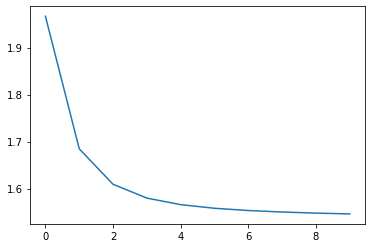

In [143]:
plt.plot(ls)

In [144]:
qq = t.log(q.exp() / q.exp().sum())

In [129]:
ex_loss = t.tensor(0.)

for i in range(n_data):
    for j in range(n_data):
        for a in range(n_data):
            for b in range(n_data):
                qs = qq[[i, j], :][:, [a, b]]
                p = pair_probs[i, a] * pair_probs[j, b]
                ex_loss += p * contrastive_loss(qs)

print(ex_loss)

tensor(1.2217, grad_fn=<AddBackward0>)


In [153]:
ex_loss = t.tensor(0.)

for i in range(n_data):
    for j in range(n_data):
        for a in range(n_data):
            for b in range(n_data):
                qs = q[[i, j], :][:, [a, b]]
                p = pair_probs[i, a] * pair_probs[j, b]
                ex_loss += p * contrastive_loss(qs)

print(ex_loss)

tensor(1.2225, grad_fn=<AddBackward0>)


In [154]:
ex_loss = t.tensor(0.)

for i in range(n_data):
    for j in range(n_data):
        for a in range(n_data):
            for b in range(n_data):
                qs = logp[[i, j], :][:, [a, b]]
                p = pair_probs[i, a] * pair_probs[j, b]
                ex_loss += p * contrastive_loss(qs)

print(ex_loss)

tensor(1.2665)


In [91]:
q.grad

tensor([[-0.0102,  0.0103,  0.0100,  0.0269,  0.0047, -0.0016, -0.0172,  0.0121,
          0.0468,  0.0045],
        [-0.0205, -0.0387,  0.0251,  0.0008, -0.0033,  0.0014,  0.0583, -0.0076,
         -0.0099, -0.0128],
        [ 0.0138, -0.0051,  0.0002,  0.0066, -0.0055,  0.0181, -0.0006, -0.0046,
         -0.0066, -0.0011],
        [ 0.0019,  0.0111,  0.0067, -0.0063,  0.0051,  0.0100, -0.0157, -0.0164,
         -0.0038, -0.0062],
        [ 0.0033, -0.0056,  0.0159, -0.0054, -0.0032,  0.0022,  0.0019, -0.0080,
         -0.0052, -0.0013],
        [-0.0095,  0.0039, -0.0238, -0.0030,  0.0053,  0.0031, -0.0029,  0.0002,
         -0.0082, -0.0043],
        [-0.0064,  0.0056,  0.0127,  0.0304,  0.0033,  0.0026, -0.0232, -0.0185,
         -0.0211,  0.0005],
        [-0.0009, -0.0081, -0.0102,  0.0008,  0.0083, -0.0121,  0.0014,  0.0021,
         -0.0167,  0.0011],
        [ 0.0147, -0.0028,  0.0036, -0.0016, -0.0035, -0.0235,  0.0059,  0.0200,
         -0.0157,  0.0179],
        [ 0.0166,  

In [145]:
ex_loss = t.tensor(0.)
loss = joint_loss

for i in range(n_data):
    for j in range(n_data):
        for a in range(n_data):
            for b in range(n_data):
                qs = q[[i, j], :][:, [a, b]]
                p = pair_probs[i, a] * pair_probs[j, b]
                ex_loss += p * loss(qs)

print(ex_loss)

tensor(2.6666, grad_fn=<AddBackward0>)


In [146]:
ex_loss = t.tensor(0.)
loss = joint_loss

for i in range(n_data):
    for j in range(n_data):
        for a in range(n_data):
            for b in range(n_data):
                qs = qq[[i, j], :][:, [a, b]]
                p = pair_probs[i, a] * pair_probs[j, b]
                ex_loss += p * loss(qs)

print(ex_loss)

tensor(2.6666, grad_fn=<AddBackward0>)


In [147]:
ex_loss = t.tensor(0.)
loss = joint_loss

for i in range(n_data):
    for j in range(n_data):
        for a in range(n_data):
            for b in range(n_data):
                qs = logp[[i, j], :][:, [a, b]]
                p = pair_probs[i, a] * pair_probs[j, b]
                ex_loss += p * loss(qs)

print(ex_loss)

tensor(2.7910)


In [148]:
pair_probs

tensor([[0.0132, 0.0094, 0.0726, 0.0413, 0.1436],
        [0.0181, 0.0084, 0.0745, 0.0056, 0.0097],
        [0.0181, 0.0265, 0.0315, 0.0305, 0.0319],
        [0.0729, 0.0609, 0.0222, 0.0191, 0.1161],
        [0.0229, 0.0507, 0.0595, 0.0221, 0.0186]])

In [151]:
softmax(logp, axis=(0,))

tensor([[0.0907, 0.0606, 0.2787, 0.3484, 0.4489],
        [0.1249, 0.0541, 0.2863, 0.0470, 0.0304],
        [0.1246, 0.1697, 0.1211, 0.2569, 0.0999],
        [0.5020, 0.3903, 0.0854, 0.1610, 0.3628],
        [0.1577, 0.3254, 0.2285, 0.1866, 0.0580]])

In [152]:
softmax(q, axis=(0,))

tensor([[0.0854, 0.0608, 0.1906, 0.2377, 0.3845],
        [0.2160, 0.0471, 0.3634, 0.1506, 0.0772],
        [0.1849, 0.2499, 0.1601, 0.3006, 0.1688],
        [0.3215, 0.2865, 0.0480, 0.1148, 0.2975],
        [0.1921, 0.3558, 0.2379, 0.1964, 0.0721]], grad_fn=<DivBackward0>)

In [156]:
t.sum(pair_probs * -t.log(softmax(logp, axis=(0, 1))))

tensor(2.9117)

In [157]:
t.sum(pair_probs * -t.log(softmax(q, axis=(0, 1))))

tensor(3.0615, grad_fn=<SumBackward0>)